# Level 2 Task 2: Time Series Analysis

- Focused on Apple stock (AAPL) data
- I used time series techniques to explore trends and patterns
- Cleaned and prepared the dataset (handled missing values)
- Converted dates and set them as index
- Plotted closing prices over time
- Broke the time series into:
  - Trend
  - Seasonality
  - Residual (random noise)
- Applied 30-day moving average to smooth out the fluctuations
- I performed all these works in Python using pandas, matplotlib, seaborn, and statsmodels.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loads the dataset
df = pd.read_csv('Stock Prices Data Set.csv')

In [3]:
# Reading few rows of the dataset
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
# Checks for the columns and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [6]:
# Cheking for null values
df.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


In [7]:
# Drops rows with null values
df_cleaned = df.dropna()

In [9]:
# Checks if the dataset still contains missing values
print(df_cleaned.isnull().sum())

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [10]:
# Converts 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Filter for Apple stock
apple = df[df['symbol'] == 'AAPL'].copy()

# Sort by date
apple.sort_values('date', inplace=True)

# Set date as index
apple.set_index('date', inplace=True)

# View it
print(apple.head())

           symbol     open     high      low    close     volume
date                                                            
2014-01-02   AAPL  79.3828  79.5756  78.8601  79.0185   58791957
2014-01-03   AAPL  78.9799  79.0999  77.2042  77.2828   98303870
2014-01-06   AAPL  76.7785  78.1142  76.2285  77.7042  103359151
2014-01-07   AAPL  77.7599  77.9942  76.8464  77.1481   79432766
2014-01-08   AAPL  76.9728  77.9371  76.9556  77.6371   64686685


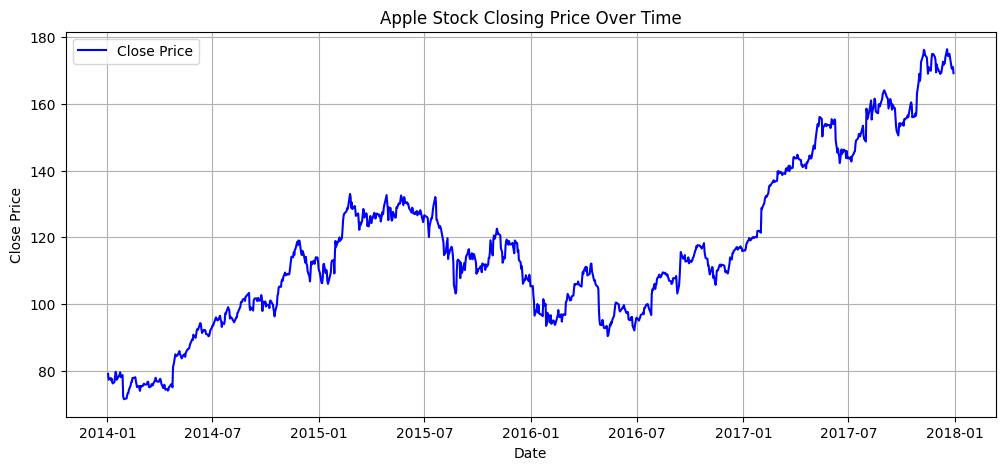

In [18]:
# This plot shows the actual closing prices of Apple stock over time.
# It helps us visually detect any general upward or downward trends,
# spikes or drops, and gives us an overall understanding of how the stock has performed.

plt.figure(figsize=(12, 5))
plt.plot(apple['close'], label='Close Price', color='blue')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Saves the plot before showing
plt.savefig('apple_close_price_over_time.png', dpi=300)
plt.show()


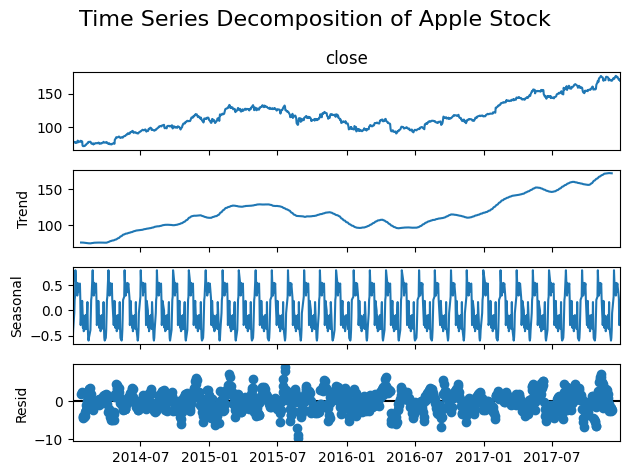

In [19]:
# This decomposition breaks the time series into three components:
# Trend: the general direction the stock price is moving over time.
# Seasonality: repeated patterns or cycles within the data (e.g., monthly effects).
# Residual: the random variation or noise left after removing trend and seasonality.
# This helps us better understand the underlying patterns in the time series.

from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposes the time series
decompose_result = seasonal_decompose(apple['close'], model='additive', period=30)  # 30 = roughly 1 month

# Ploting the components
decompose_result.plot()
plt.suptitle('Time Series Decomposition of Apple Stock', fontsize=16)

# Saves the image of the graphs
plt.savefig('apple_price_decomposition.png', dpi=300)
plt.tight_layout()
plt.show()

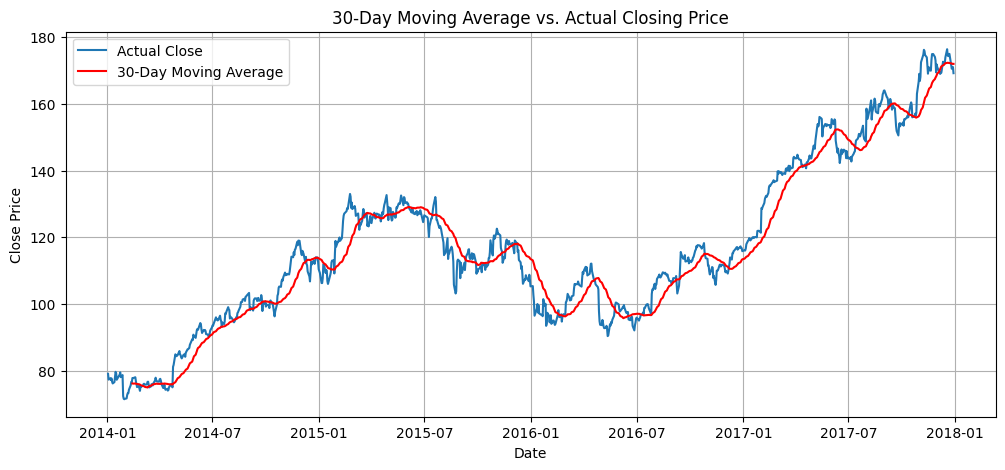

In [20]:
# Calculating the moving average (window of 30 days)
# This plot compares the actual closing prices with a 30-day moving average.
# The moving average smooths out short-term fluctuations, making the longer-term trend more visible.
# It's useful for identifying the stock's momentum and seeing if it's generally rising or falling.

apple['MA_30'] = apple['close'].rolling(window=30).mean()

# Plot original vs. smoothed
plt.figure(figsize=(12, 5))
plt.plot(apple['close'], label='Actual Close')
plt.plot(apple['MA_30'], label='30-Day Moving Average', color='red')
plt.title('Apple Stock - Close Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.title('30-Day Moving Average vs. Actual Closing Price')

# Saving the plot
plt.savefig('apple_moving_average.png', dpi=300)
plt.show()